UNSUPERVISED LEARNING

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
encoder = models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                             layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2D(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Flatten(),
                             layers.Dense(64, activation='relu')])

decoder = models.Sequential([layers.InputLayer(input_shape=(64,)),
                             layers.Dense(7*7*64, activation='relu'),
                             layers.Reshape((7,7,64)),
                             layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                             layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')])

autoencoder = models.Sequential([encoder,decoder])
autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 222ms/step - loss: 0.2816 - val_loss: 0.0871
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 217ms/step - loss: 0.0842 - val_loss: 0.0770
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 213ms/step - loss: 0.0765 - val_loss: 0.0735
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 214ms/step - loss: 0.0738 - val_loss: 0.0721
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 223ms/step - loss: 0.0722 - val_loss: 0.0711
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 204ms/step - loss: 0.0713 - val_loss: 0.0703
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - loss: 0.0708 - val_loss: 0.0699
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 211ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 205ms/step - loss: 0.0696 - val_loss: 0.0691
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 205ms/step - loss: 0.0693 - val_loss: 0.0688


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


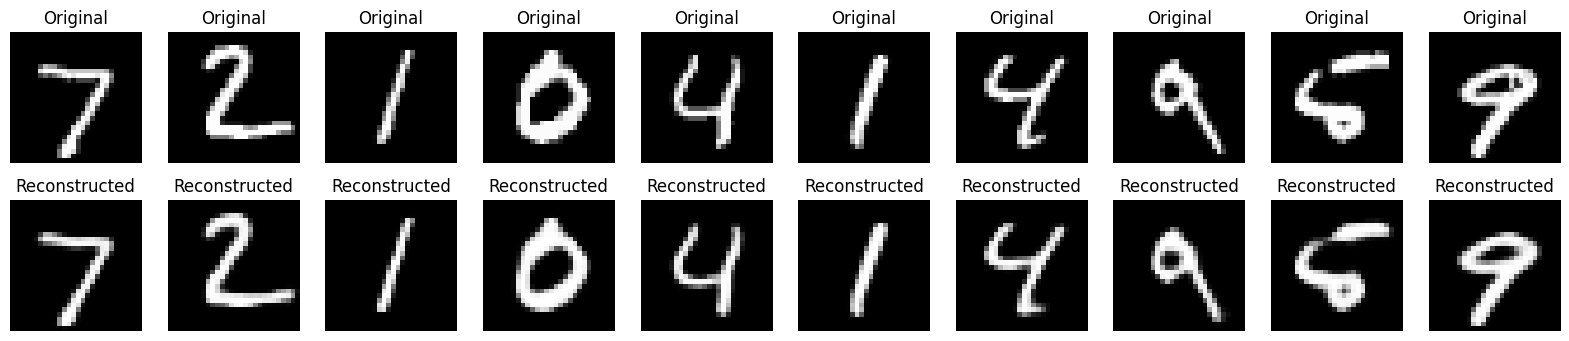

In [ ]:
decoded_images = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Original")
    plt.gray()
    ax.axis('off')

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap="gray")
    plt.title("Reconstructed")
    plt.gray()
    ax.axis('off')


In [ ]:
plt.show()